In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from stemgraphic import stem_graphic

In [4]:
df_emprg_orc = pd.read_excel('estatistica.basica.bussab.9ed/Dados_EB.xls',
                      header=1,
                      index_col=0,
                      names=['num','estado_civil','instrucao','filhos','salario','anos','meses','procedencia'])
df_emprg_orc.index.name = 'Num'
df_emprg_orc['filhos'].fillna(0,inplace=True)
df_emprg_orc['filhos'] = df_emprg_orc['filhos'].astype('int64')

df_cd_brasil =  pd.read_excel('estatistica.basica.bussab.9ed/CD-Brasil.xls',
                      header=4,
                      names=['regiao','uf','superficie','populacao','densidade'])
filtro = (df_cd_brasil['uf'] == 'Subtot') | (df_cd_brasil['uf'] == 'Total')
df_cd_brasil = df_cd_brasil[~filtro] #retira os Subtotais e totais
df_cd_brasil['regiao'].fillna(method='ffill',inplace=True) #preenche as regiões vazias com a anterior

df_cd_municipio =  pd.read_excel('estatistica.basica.bussab.9ed/CD-Municipios.xls',
                    header=0,
                      names=['num','municipio','populacao'],
                      index_col=0)

# Problemas - Cap 01

### Problema 02
<p>Usando os dados da tabela 2.1, construa a distribuição de frequencias das variáveis</p
<ol>
<li> Estado Civil
<li>Região de Procedência 
<li>Números de filhos dos empregados casados
<li>idade
</ol>

estado_civil
casado      20
solteiro    16
Name: freq, dtype: int64

[Text(0.5, 0, '')]

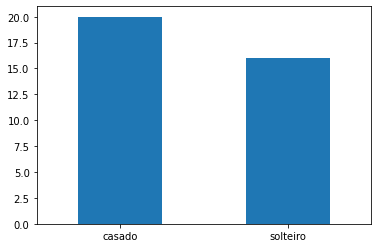

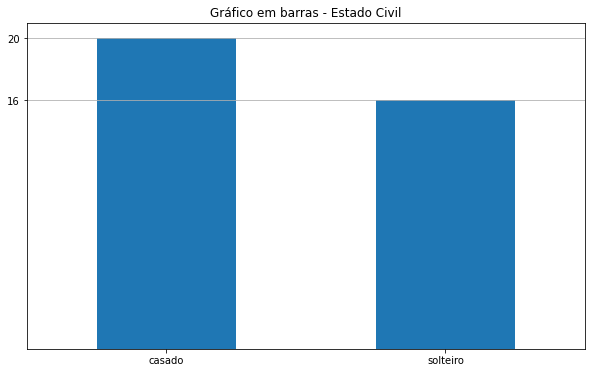

In [5]:
#Estado Civil
pd.value_counts(df_emprg_orc['estado_civil']).plot(kind='bar',rot=0)
df_fq_estado_civil = df_emprg_orc.groupby(df_emprg_orc['estado_civil'])['estado_civil'].count()
df_fq_estado_civil.name='freq'
display(df_fq_estado_civil)
fig,ax = plt.subplots(figsize=(10, 6))
df_fq_estado_civil.plot(kind='bar',ax=ax,rot=0)
ax.set(title='Gráfico em barras - Estado Civil')
ax.set(yticks=df_fq_estado_civil.values)
ax.grid(axis='y')
ax.set(xlabel='')

procedencia
capital     11
interior    12
outra       13
Name: freq, dtype: int64

[Text(0.5, 0, '')]

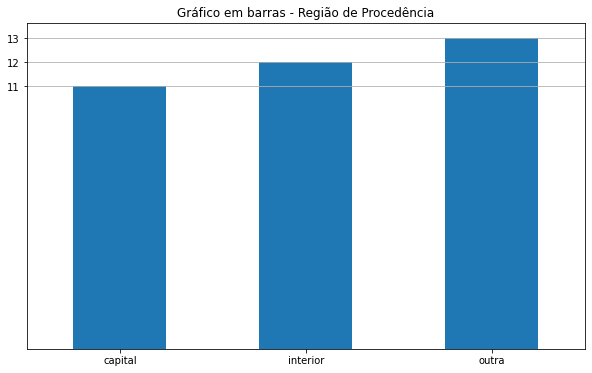

In [6]:
#região de procedẽncia
df_procedencia = df_emprg_orc.groupby(df_emprg_orc['procedencia'])['procedencia'].count()
df_procedencia.name='freq'
display(df_procedencia)
fig,ax = plt.subplots(figsize=(10, 6))
df_procedencia.plot(kind='bar',ax=ax,rot=0)
ax.set(title='Gráfico em barras - Região de Procedência')
ax.set(yticks=df_procedencia.values)
ax.grid(axis='y')
ax.set(xlabel='')

filhos
0    4
1    5
2    7
3    3
5    1
Name: freq, dtype: int64

[Text(0.5, 0, '')]

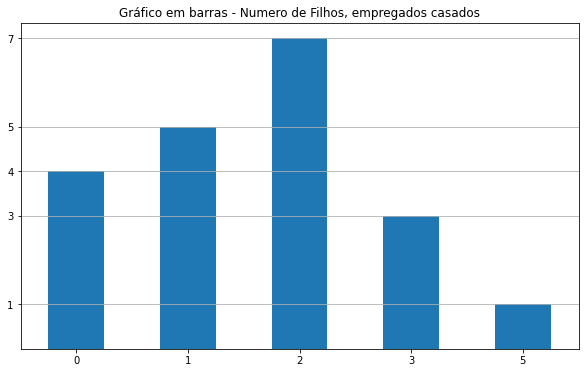

In [7]:
#número de filhos (empregado casado)
df_filhos = df_emprg_orc[df_emprg_orc.estado_civil=='casado'].groupby(df_emprg_orc['filhos'])['filhos'].count()
df_filhos.name='freq'
display(df_filhos)
fig,ax = plt.subplots(figsize=(10, 6))
df_filhos.plot(kind='bar',ax=ax,rot=0)
ax.set(title='Gráfico em barras - Numero de Filhos, empregados casados')
ax.set(yticks=df_filhos.values)
ax.grid(axis='y')
ax.set(xlabel='')

[18, 25)      2
[25, 35)     16
[35, 60)     18
[60, 100)     0
Name: anos, dtype: int64

[Text(0.5, 0, '')]

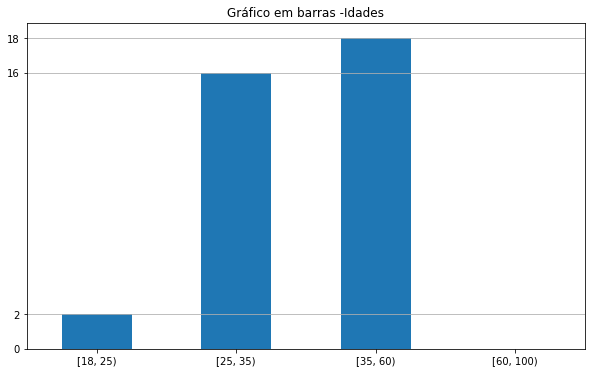

In [8]:
#idade
df_anos = df_emprg_orc.groupby(df_emprg_orc['anos'])['anos'].count() #contagem das idades
df_anos.name='freq' #renomeia coluna


bins = [18,25,35,60,100] 
cats = pd.cut(df_emprg_orc['anos'],bins,right=False) #cria as classes
df_anos = pd.value_counts(cats,sort=False) #conta as classes
display(df_anos) #mostra os dados

fig,ax = plt.subplots(figsize=(10, 6))
df_anos.plot(kind='bar',ax=ax,rot=0)
ax.set(title='Gráfico em barras -Idades')
ax.set(yticks=df_anos.values)
ax.grid(axis='y')
ax.set(xlabel='')

### Problema 03
<p>Para o conjunto de dados 1 CD-Brasil, construa a distribuição de frequências para as variáveis população e densidade populacional</p>

(356293.04, 6967719.17]       18
(6967719.17, 13539713.33]      5
(13539713.33, 20111707.5]      3
(20111707.5, 26683701.67]      0
(26683701.67, 33255695.83]     0
(33255695.83, 39827690.0]      1
Name: populacao, dtype: int64

[Text(0.5, 0, '')]

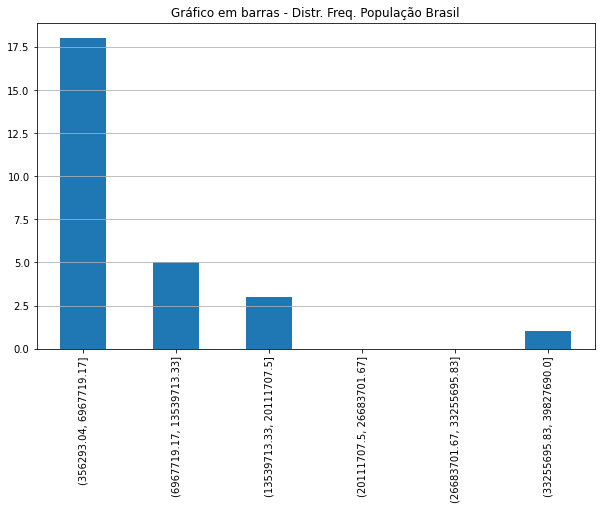

In [9]:
#distribuição frequencia população do Brasil
display(pd.value_counts(pd.cut(df_cd_brasil['populacao'],6,precision=2),sort=False))
fig,ax = plt.subplots(figsize=(10, 6))

pd.value_counts(pd.cut(df_cd_brasil['populacao'],6,precision=2),sort=False).plot(kind='bar')

ax.set(title='Gráfico em barras - Distr. Freq. População Brasil')
#ax.set(yticks=df_anos.values)
ax.grid(axis='y')
ax.set(xlabel='')

(1.34, 72.02]       20
(72.02, 142.27]      4
(142.27, 212.53]     1
(212.53, 282.78]     0
(282.78, 353.04]     1
(353.04, 423.29]     1
Name: densidade, dtype: int64

[Text(0.5, 0, '')]

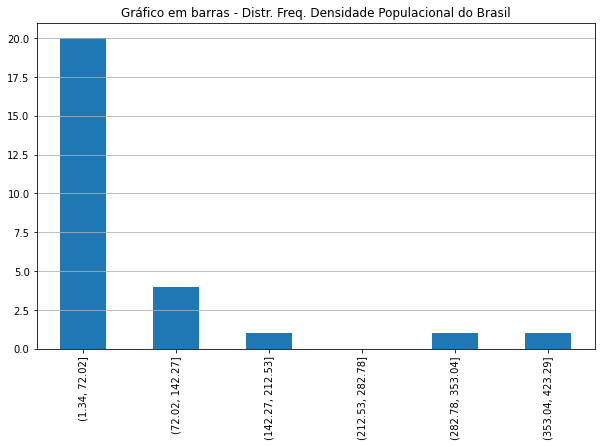

In [10]:
#distribuição frequencia desensidade populacional do Brasil
bins = 6
display(pd.value_counts(pd.cut(df_cd_brasil['densidade'],bins,precision=2),sort=False))
fig,ax = plt.subplots(figsize=(10, 6))

pd.value_counts(pd.cut(df_cd_brasil['densidade'],bins,precision=2),sort=False).plot(kind='bar')

ax.set(title='Gráfico em barras - Distr. Freq. Densidade Populacional do Brasil')
#ax.set(yticks=df_anos.values)
ax.grid(axis='y')
ax.set(xlabel='')

### Problema 04
<p> Constou-se o número de erros de impressão da primeira página de um jornal durante 50 dias obtendo-se os resultados abaixo:</p>
<ol>
<li> Represente os dados graficamente
<li> Faça um histograma e um ramo e folhas
</ol>

[Text(0.5, 1.0, 'Gráficos - Num. de Erros')]

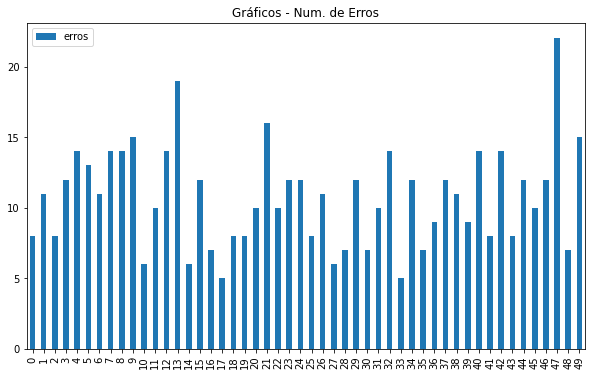

In [11]:
erros = [8,11,8,12,14,13,11,14,14,15,
        6,10,14,19,6,12,7,5,8,8,
        10,16,10,12,12,8,11,6,7,12,
        7,10,14,5,12,7,9,12,11,9,
        14,8,14,8,12,10,12,22,7,15]


fig,ax = plt.subplots(figsize=(10, 6))
df_erros = pd.DataFrame({'erros':erros})
df_erros.plot(kind='bar',ax=ax)
ax.set(title='Gráficos - Num. de Erros')


[[<matplotlib.axis.XTick at 0x7f1421b37d30>,

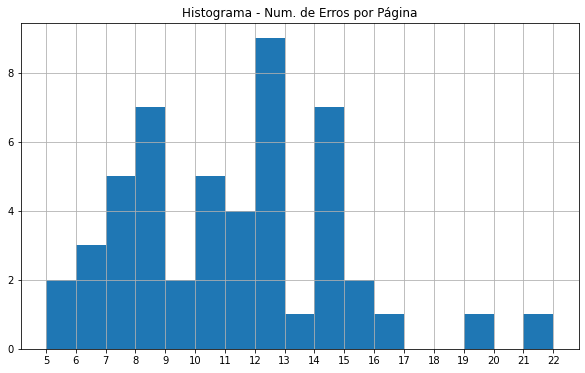

In [12]:
fig,ax = plt.subplots(figsize=(10, 6))
df_erros.hist(bins=17,ax=ax)
ax.set(title='Histograma - Num. de Erros por Página')
ax.set(xticks=range(5,23))

(<Figure size 540x378 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f1421af1cf8>)

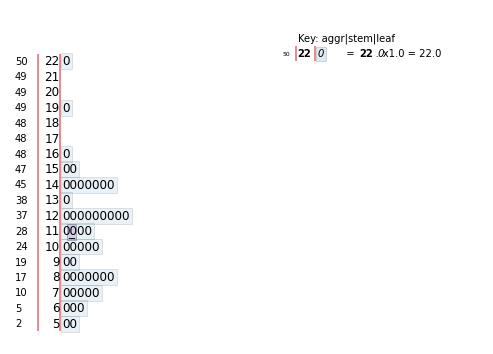

In [13]:
stem_graphic(df_erros['erros'])

### Problema 05
<p> Usando os resultados do problema 2 e tabela 4.3
<ol>
<li> Construa um histograma para a variável idade ;e
<li> proponha uma representação para a variável idade
</ol>


[[<matplotlib.axis.XTick at 0x7f1421f1df60>,

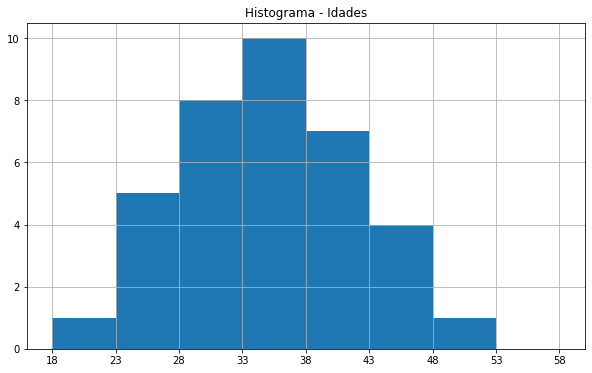

In [14]:
#idade
df_anos = df_emprg_orc['anos'] #contagem das idades
# display(df_anos) #mostra os dados

bins = range(18,60,5)

fig,ax = plt.subplots(figsize=(10, 6))
df_anos.hist(bins=bins)
ax.set(title='Histograma - Idades')
ax.set(xticks=bins)
# ax.grid(axis='y')
# ax.set(xlabel='')

[Text(0.5, 1.0, 'Gráfico barras - Idades')]

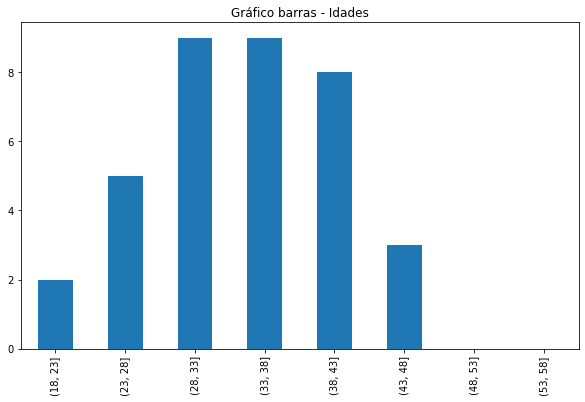

In [15]:
cats = pd.cut(df_anos,bins=bins)
fig,ax = plt.subplots(figsize=(10, 6))
cats.value_counts(sort=False).plot(kind='bar',ax=ax)
ax.set(title='Gráfico barras - Idades')

### Problema 6
<p> As taxas médias geométricas de incremento anual (por 100 habitantes) dos 30 maiores municípios do Brasil estão dadas abaixo</p>

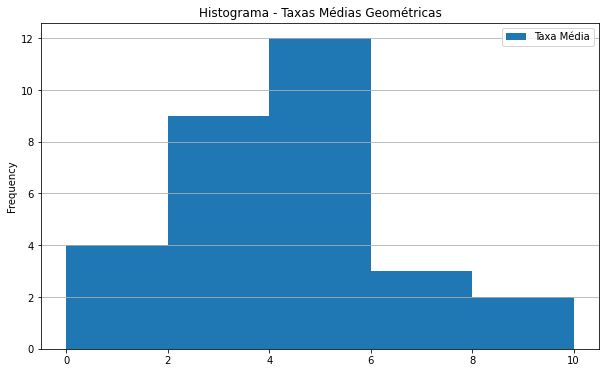

In [16]:
tx_medias = [3.67,1.82,3.73,4.10,4.30,
             1.28,8.14,2.43,4.17,5.36,
             3.96,6.54,5.84,7.35,3.63,
             2.93,2.82,8.45,5.28,5.41,
             7.77,4.65,1.88,2.12,4.26,
             2.78,5.54,0.90,5.09,4.07]
df_medias = pd.DataFrame(tx_medias)
df_medias.columns = ['Taxa Média']
bins=[0,2,4,6,8,10]
labels = [2,4,6,8,10]
fig,ax = plt.subplots(figsize=(10, 6))
# display(df_medias))
df_medias.plot(kind='hist',bins=bins,ax=ax)
ax.set(xticks=bins,title='Histograma - Taxas Médias Geométricas')
ax.grid(axis='y')

<AxesSubplot:xlabel='cats', ylabel='freq'>

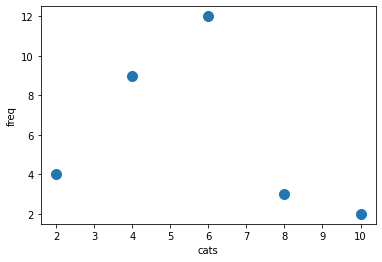

In [17]:
cats = pd.cut(tx_medias,bins=bins,right=False,labels=labels).value_counts()
cats.name = 'freq'
cats.index.name='cats'
cats = pd.DataFrame(cats)
cats.reset_index(inplace=True)
cats.plot(kind='scatter',x='cats',y='freq',s=100)


### Problema 7
<p> Você foi convidado para chefiar uma seção (dentre duas oferecidas).A seção de pessoal passou dados sobre as duas seções uma agrupada e outra não agrupada, qual seria sua decisão</p>

In [18]:
print(f'Quantidade de empregados na seção: {df_emprg_orc.shape[0]}')
display(df_emprg_orc['instrucao'].value_counts())
cats = pd.cut(df_emprg_orc['salario'],bins=np.arange(1.5,26.,3.0))
display(cats.value_counts(sort=False))
# display(df_emprg_orc['salario'])
# # df_emprg_orc['instrucao'].sum()

Quantidade de empregados na seção: 36


ensino médio          18
ensino fundamental    12
superior               6
Name: instrucao, dtype: int64

(1.5, 4.5]      1
(4.5, 7.5]      8
(7.5, 10.5]     9
(10.5, 13.5]    7
(13.5, 16.5]    6
(16.5, 19.5]    4
(19.5, 22.5]    0
(22.5, 25.5]    1
Name: salario, dtype: int64

### Problema 8 
<p> Construa um histograma, um ramo e folhas e gráfico de dispersão unidemensional para o conjunto de dados 2 (CD-Municipos).

Int64Index([45, 65, 85, 105, 125, 145, 165, 185, 205], dtype='int64')

<AxesSubplot:xlabel='cats', ylabel='populacao'>

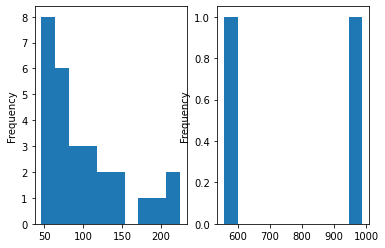

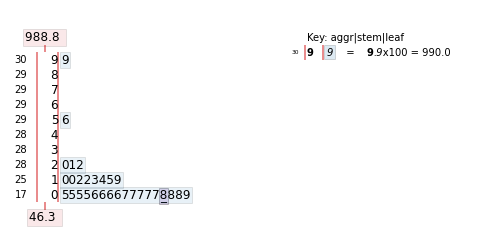

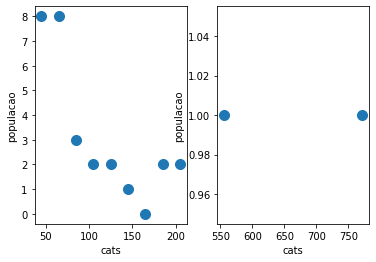

In [19]:
#histograma, separado em dois, um para cidades com menos de 235mil hab e outro para cidades com mais de 235mil hab.
linhas=1
colunas = 2
bins1=range(45,235,20)
labels = list(bins)[:-1] #retira o último item do range
df_populacao_menor = df_cd_municipio[df_cd_municipio.populacao < 235]
df_populacao_maior = df_cd_municipio[df_cd_municipio.populacao >= 235]

fig,axes = plt.subplots(1,2)
df_populacao_menor['populacao'].plot(kind='hist',bins=10,ax=axes[0])
df_populacao_maior['populacao'].plot(kind='hist',bins=10,ax=axes[1])

#ramo e folhas
stem_graphic(df_cd_municipio['populacao'])

#dispersão unidimensional
bins=range(45,235,20)
labels = list(bins)[:-1] #retira o último item do range
fig,axes = plt.subplots(1,2)
cats = pd.cut(df_populacao_menor['populacao'],bins=bins,labels=labels,right=False).value_counts(sort=False)
display(cats.index.values.categories)
cats.index.name='cats'
cats = pd.DataFrame(cats)
cats.reset_index(inplace=True)
cats.plot(kind='scatter',x='cats',y='populacao',s=100,ax=axes[0])

bins = [556,772,990]
labels= [556,772]
cats = pd.cut(df_populacao_maior['populacao'],bins=bins,labels=labels,right=False).value_counts(sort=False)

cats.index.name='cats'
cats = pd.DataFrame(cats)
cats.reset_index(inplace=True)
cats.plot(kind='scatter',x='cats',y='populacao',s=100,ax=axes[1])

### 2.5 Exemplos Computacionais
#### Exemplo 2.10
<p> Histograma conjunto de nota de estatíscica (CD-Notas)</p>

<AxesSubplot:ylabel='Frequency'>

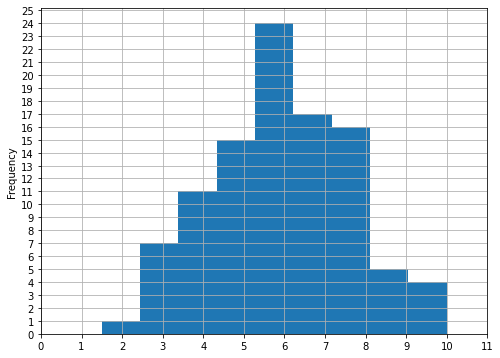

In [20]:
df_cd_notas = pd.read_excel('estatistica.basica.bussab.9ed/CD-Notas.xls',                            
                            squeeze=True,
                           names = range(10),
                           skiprows=[0,1,2])

df_cd_notas = pd.concat([df_cd_notas[0],
           df_cd_notas[1],
           df_cd_notas[2],
           df_cd_notas[3],
           df_cd_notas[4],
           df_cd_notas[5],
           df_cd_notas[6],
           df_cd_notas[7],
           df_cd_notas[8],
           df_cd_notas[9]])
df_cd_notas.reset_index(drop=True,inplace=True)
df_cd_notas.plot(kind='hist',
                 bins=9,
                 xticks=range(12),
                 yticks=range(26),
                 grid=True,
                 figsize=(8,6))

<AxesSubplot:xlabel='nota', ylabel='freq'>

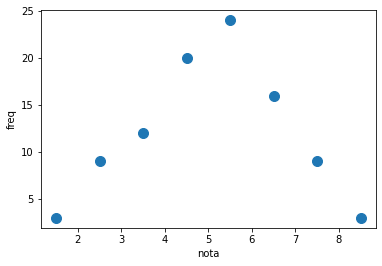

In [21]:
cats_notas = pd.cut(df_cd_notas,bins=np.arange(1.5,10.5,1),labels=np.arange(1.5,9.5)).value_counts()
cats_notas.name='freq'
cats_notas.index.name = 'nota'
cats_notas = pd.DataFrame(cats_notas)
cats_notas.reset_index(inplace=True)

cats_notas.plot(kind='scatter',x='nota',y='freq',s=100)

(<Figure size 540x342 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f1420a54940>)

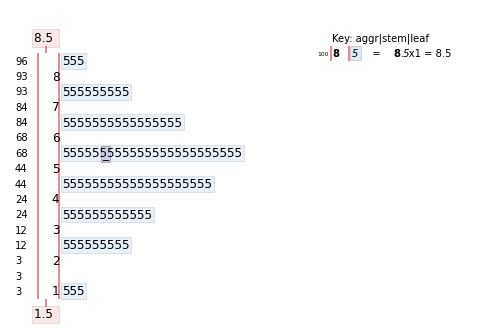

In [22]:
#ramo e folhas
# stem_graphic(cats_notas['freq'])

stem_graphic(pd.cut(df_cd_notas,bins=np.arange(1.5,10.5,1),labels=np.arange(1.5,9.5)))

#### Exemplo 2.11
<p> O Conjunto de dados CD-Poluição traz dados sobre a poluição na cidade de São Paulo. Tomemos os dados...</p>

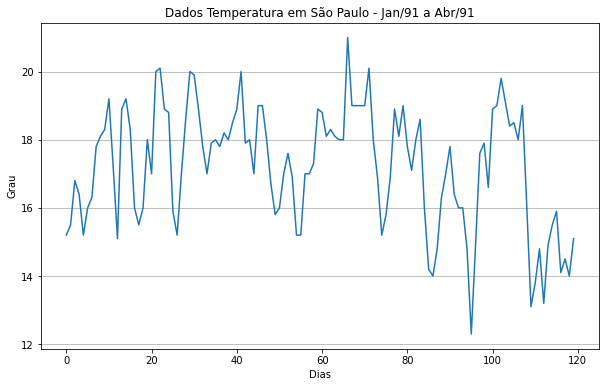

In [23]:
df_cd_poluicao = pd.read_excel('estatistica.basica.bussab.9ed/CD-Poluicao.xls',
                      header=6,
                      index_col=0,
                      #names=['num','estado_civil','instrucao','filhos','salario','anos','meses','procedencia'],
                            skiprows=[0,5])
df_cd_poluicao.reset_index(inplace=True)

fig,ax = plt.subplots(figsize=(10, 6))

df_cd_poluicao['temp'].plot()

ax.set(title='Dados Temperatura em São Paulo - Jan/91 a Abr/91',
       ylabel='Grau',
       xlabel='Dias')
ax.grid(axis='y')

(<Figure size 540x396 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f142087f0f0>)

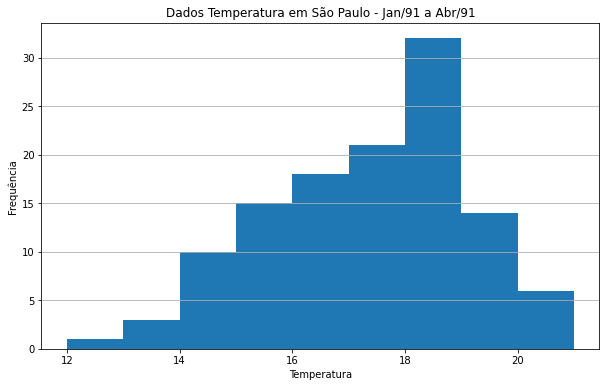

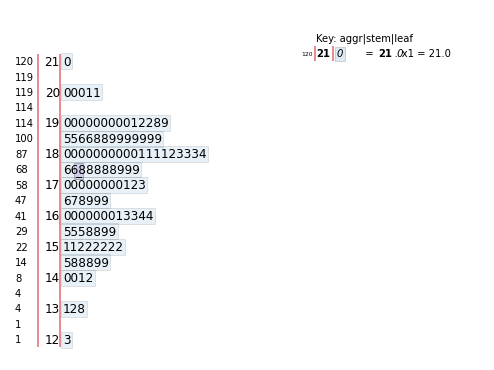

In [24]:
fig,ax = plt.subplots(figsize=(10, 6))
df_cd_poluicao['temp'].plot(kind='hist',bins=np.arange(12,22,1))
ax.set(title='Dados Temperatura em São Paulo - Jan/91 a Abr/91',
       ylabel='Frequência',
       xlabel='Temperatura')
ax.grid(axis='y')
stem_graphic(df_cd_poluicao['temp'])

In [39]:
display(df_cd_poluicao['CO'].min())
display(df_cd_poluicao['CO'].quantile(q=0.25))
display(df_cd_poluicao['CO'].quantile(q=0.5))
display(df_cd_poluicao['CO'].quantile(q=0.75))
display(df_cd_poluicao['CO'].max())
display(df_cd_poluicao['CO'].mean())
display(df_cd_poluicao['CO'].std())
display(df_cd_poluicao['CO'].var())

4.7

6.3

7.2

8.025

12.5

7.464166666666667

1.543911644254977

2.3836631652661064